In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Sel 1: Data Understanding
Tahap ini bertujuan untuk memahami struktur data, mengecek nilai yang hilang, dan melihat statistik dasar dari data klinis pasien gagal jantung.

--- Info Dataset ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 

/tmp/ipython-input-75827851.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='DEATH_EVENT', data=df, palette='magma')


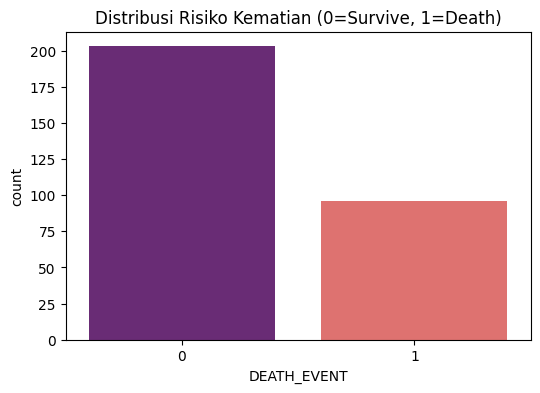

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Load file CSV
file_path = '/content/drive/MyDrive/Machine_Learning/projek_ML/heart_failure_clinical_records_dataset.csv'
df = pd.read_csv(file_path)


# 2. Eksplorasi Struktur Data
print("--- Info Dataset ---")
print(df.info()) # Menampilkan tipe data dan jumlah baris

print("\n--- Statistik Deskriptif ---")
print(df.describe()) # Menampilkan rata-rata, min, max

# 3. Visualisasi Target (DEATH_EVENT)
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=df, palette='magma')
plt.title('Distribusi Risiko Kematian (0=Survive, 1=Death)')
plt.show()

Sel 2: Data Preparation
Langkah ini menyiapkan data agar siap diproses oleh model Neural Networks, termasuk pembagian fitur, target, dan standarisasi nilai.

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Memisahkan fitur (X) dan target (y)
X = df.drop('DEATH_EVENT', axis=1) # Menghapus kolom target dari fitur
y = df['DEATH_EVENT'] # Menentukan kolom target

# Pembagian data Training dan Testing dengan rasio 70:30 [cite: 36]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

# Standarisasi data (Penting untuk konvergensi Neural Networks)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Latih (70%): {X_train_scaled.shape[0]} sampel")
print(f"Data Uji (30%): {X_test_scaled.shape[0]} sampel")

Data Latih (70%): 209 sampel
Data Uji (30%): 90 sampel


Sel 3: Desain Neural Networks
Membangun arsitektur model sesuai dengan tugas klasifikasi biner untuk memprediksi risiko kematian.

In [12]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Membangun Model End-to-End
model = Sequential([
    # Input Layer & Hidden Layer 1 (32 neuron)
    Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.2), # Mengurangi overfitting

    # Hidden Layer 2 (16 neuron)
    Dense(16, activation='relu'),
    Dropout(0.2),

    # Output Layer (Sigmoid untuk klasifikasi 0/1)
    Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 32)             │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 961 (3.75 KB)

 Trainable params: 961 (3.75 KB)

 Non-trainable params: 0 (0.00 B)

Sel 4: Training (70:30) dan Evaluasi Model
Melakukan pelatihan model dan mengevaluasi performanya menggunakan metrik akurasi dan confusion matrix.

Akurasi Model: 0.7778
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step

--- Classification Report ---
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        61
           1       0.67      0.62      0.64        29

    accuracy                           0.78        90
   macro avg       0.75      0.74      0.74        90
weighted avg       0.77      0.78      0.78        90



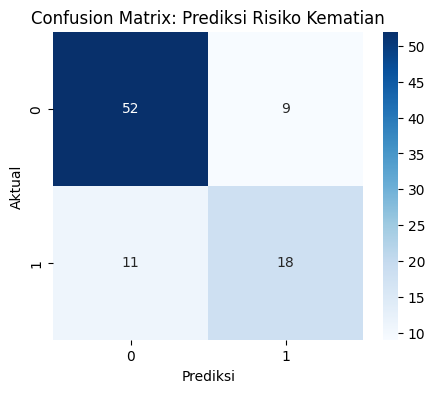

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Proses Training
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.1, # Mengambil sebagian kecil data latih untuk validasi
    verbose=0
)

# Evaluasi pada data test (30%)
loss, accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Akurasi Model: {accuracy:.4f}")

# Prediksi hasil klasifikasi perilaku pasien
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)

# Menampilkan Laporan Evaluasi
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))

# Visualisasi Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: Prediksi Risiko Kematian')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

# 5. Interpretasi Hasil dari Perspektif Sistem Informasi
Dukungan Keputusan Medis: Model ini berfungsi sebagai sistem pendukung keputusan bagi tenaga medis untuk membedakan pasien dengan risiko kematian rendah dan tinggi berdasarkan data klinis secara objektif.

Efisiensi Sistem Informasi Kesehatan: Integrasi model NN ke dalam Electronic Health Records (EHR) memungkinkan sistem memberikan tanda bahaya (alert) otomatis kepada dokter saat data laboratorium pasien menunjukkan pola berisiko.

Analisis Data Publik: Penggunaan dataset ini membuktikan bahwa pengolahan data publik secara end-to-end dapat memberikan wawasan prediktif yang krusial untuk manajemen rumah sakit dalam mengalokasikan sumber daya perawatan intensif.